#### 1. Load the dataset and display the first five rows. Summarize the dataset using descriptive statistics.

In [5]:
import pandas as pd
# Load dataset and display the first five rows
data = pd.read_csv('electrical_dataset.csv')
print(data.head())

# Summarize the dataset with descriptive statistics
print(data.describe(include='all'))

             Timestamp  Voltage (V)  Current (I)    Power (W)  Power_Factor  \
0  2024-12-01 00:00:00   222.483571     4.642510   965.023943      0.880626   
1  2024-12-01 00:01:00   219.308678     4.206038   894.158159      0.939144   
2  2024-12-01 00:02:00   223.238443     4.143615          NaN      0.864156   
3  2024-12-01 00:03:00   227.615149     4.188552  1006.917263      0.926711   
4  2024-12-01 00:04:00          NaN     5.165739  1081.262142      0.931754   

   Temperature (°C)  Humidity (%)  
0         21.734855     45.494834  
1               NaN     46.477508  
2         17.952615     64.195316  
3         19.613098     37.214868  
4         21.783244     55.741660  
                  Timestamp  Voltage (V)  Current (I)    Power (W)  \
count                 10000  9500.000000  9600.000000  9700.000000   
unique                10000          NaN          NaN          NaN   
top     2024-12-01 00:00:00          NaN          NaN          NaN   
freq                      1  

#### 2. Identify the columns with missing values in the dataset. Calculate the percentage of missing values for each column. Impute the missing values using appropriate techniques (e.g., mean, median, or forward fill). Explain your choice.

##### 2.1 Identify the columns with missing values in the dataset. Calculate the percentage of missing values for each column.

In [6]:
# Identify columns with missing values
missing_values = data.isnull().sum()
percent_missing = (missing_values / len(data)) * 100
print("Missing Values:\n", missing_values)
print("\nPercentage of Missing Values:\n", percent_missing)

Missing Values:
 Timestamp             0
Voltage (V)         500
Current (I)         400
Power (W)           300
Power_Factor        200
Temperature (°C)    300
Humidity (%)        400
dtype: int64

Percentage of Missing Values:
 Timestamp           0.0
Voltage (V)         5.0
Current (I)         4.0
Power (W)           3.0
Power_Factor        2.0
Temperature (°C)    3.0
Humidity (%)        4.0
dtype: float64


##### 2.2 Impute the missing values using appropriate techniques (e.g., mean, median, or forward fill). Explain your choice.

In [7]:
# Impute missing values
data['Voltage (V)'].fillna(data['Voltage (V)'].mean(), inplace=True)
# Explaination: Using the mean fills missing values by maintaining the overall average of the data, which works well when there are few outliers.
data['Current (I)'].fillna(data['Current (I)'].mean(), inplace=True)
#Explanation: Using the mean fills missing values by maintaining the overall average of the data, which works well when there are few outliers.
data['Power (W)'].fillna(data['Power (W)'].median(), inplace=True)
#Explanation: Using the median fills missing values by maintaining the middle value of the data, which works well when there are many outliers.
data['Temperature (°C)'].fillna(method='ffill', inplace=True)
#Explanation: Using the forward fill method fills missing values with the previous value in the dataset.
data['Humidity (%)'].fillna(method='bfill', inplace=True)
#Explanation: Using the backward fill method fills missing values with the next value in the dataset.

C:\Users\ajayd\AppData\Local\Temp\ipykernel_3156\2625093720.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Voltage (V)'].fillna(data['Voltage (V)'].mean(), inplace=True)
C:\Users\ajayd\AppData\Local\Temp\ipykernel_3156\2625093720.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

#### 3. Apply suitable methods to fill missing values in the dataset. For numerical columns, use mean or median, and for categorical columns, use mode. Justify your choice.

In [26]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)  # Fill with mean for all numerical columns

# For categorical columns (e.g., 'Shift', 'Category', etc.)
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)  # Fill with mode for all categorical columns

C:\Users\ajayd\AppData\Local\Temp\ipykernel_3156\575573473.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)  # Fill with mean for all numerical columns
C:\Users\ajayd\AppData\Local\Temp\ipykernel_3156\575573473.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

#### 4. Detect outliers in the 'Voltage (V)' and 'Power (W)' columns using the IQR method. How many outliers are present in each column?

In [8]:
# Define a function to detect outliers using IQR
def detect_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    return len(outliers)

voltage_outliers = detect_outliers('Voltage (V)')
power_outliers = detect_outliers('Power (W)')
print(f"Voltage outliers: {voltage_outliers}")
print(f"Power outliers: {power_outliers}")

Voltage outliers: 127
Power outliers: 0


#### 5. Normalize the 'Power (W)' column using Min-Max scaling. Verify that the transformed data falls between 0 and 1.

In [10]:
# Normalize 'Power (W)'
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Power (W) Normalized'] = scaler.fit_transform(data[['Power (W)']])
print(data['Power (W) Normalized'].describe())

count    10000.000000
mean         0.472207
std          0.187965
min          0.000000
25%          0.326754
50%          0.469922
75%          0.608313
max          1.000000
Name: Power (W) Normalized, dtype: float64


#### 6. Assume the Timestamp column represents data recorded during different shifts (e.g., Morning, Afternoon, Evening, Night). Create a new categorical feature, ‘Shift’ . Group the dataset by Shiftand calculate the average Power (W) and Temperature for each shift.

In [11]:
# Create a 'Shift' column
def assign_shift(timestamp):
    hour = pd.to_datetime(timestamp).hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

data['Shift'] = data['Timestamp'].apply(assign_shift)

# Group by 'Shift' and calculate averages
shift_group = data.groupby('Shift')[['Power (W)', 'Temperature (°C)']].mean()
print(shift_group)

             Power (W)  Temperature (°C)
Shift                                   
Afternoon  1102.399920         20.153809
Evening    1102.148928         20.176313
Morning    1104.019264         19.925411
Night      1101.599923         19.725183


#### 7. Create a new feature called 'Energy_Efficiency', calculated as 'Power (W) * Power_Factor'. Analyze the correlation between 'Energy_Efficiency' and 'Temperature (C)’.

In [12]:
# Create 'Energy_Efficiency'
data['Energy_Efficiency'] = data['Power (W)'] * data['Power_Factor']

# Analyze correlation with 'Temperature (°C)'
correlation = data['Energy_Efficiency'].corr(data['Temperature (°C)'])
print(f"Correlation: {correlation}")

Correlation: -0.010066573484005182


#### 8. Aggregate the data to compute the average 'Voltage (V)' and 'Current (I)' for each hour. Visualize the hourly trends.

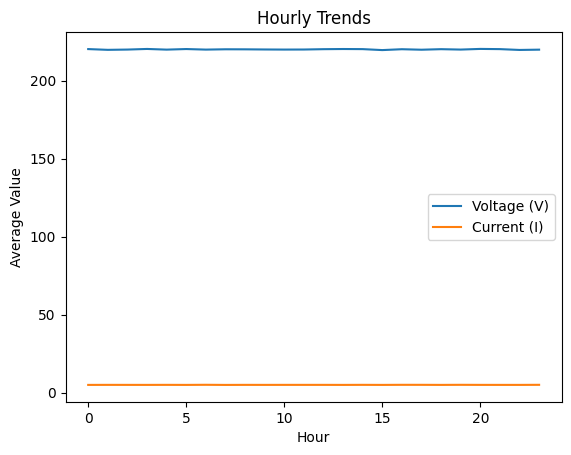

In [13]:
# Aggregate data by hour
data['Hour'] = pd.to_datetime(data['Timestamp']).dt.hour
hourly_data = data.groupby('Hour')[['Voltage (V)', 'Current (I)']].mean()

# Visualize trends
import matplotlib.pyplot as plt

hourly_data.plot()
plt.title('Hourly Trends')
plt.xlabel('Hour')
plt.ylabel('Average Value')
plt.legend(['Voltage (V)', 'Current (I)'])
plt.show()

#### 9. Categorize the 'Humidity (%)' into bins:
- Low: 30-50%
- Medium: 50-60%
- High: 60-70%
<p>Encode these categories numerically and add them as a new column.<p>

In [14]:
# Categorize 'Humidity (%)'
def categorize_humidity(humidity):
    if 30 <= humidity < 50:
        return 'Low'
    elif 50 <= humidity < 60:
        return 'Medium'
    elif 60 <= humidity < 70:
        return 'High'
    else:
        return 'Unknown'

data['Humidity_Category'] = data['Humidity (%)'].apply(categorize_humidity)

# Encode numerically
data['Humidity_Category_Encoded'] = data['Humidity_Category'].astype('category').cat.codes

#### 10. Compute the Pearson correlation matrix.

In [22]:
# Compute the Pearson correlation matrix(excluding non-numeric columns)
data_selected = data.drop(columns=['Hour', 'Humidity_Category', 'Humidity_Category_Encoded', 'Shift','Timestamp'])
correlation_matrix = data_selected.corr()
print(correlation_matrix)
# Find the strongest correlation
strongest_corr = correlation_matrix.unstack().sort_values(ascending=False)
print(f"Strongest Correlation: {strongest_corr[1]}")

                      Voltage (V)  Current (I)  Power (W)  Power_Factor  \
Voltage (V)              1.000000    -0.004613   0.160884     -0.007106   
Current (I)             -0.004613     1.000000   0.846713     -0.023374   
Power (W)                0.160884     0.846713   1.000000     -0.016370   
Power_Factor            -0.007106    -0.023374  -0.016370      1.000000   
Temperature (°C)        -0.004322    -0.006430  -0.006724     -0.002752   
Humidity (%)             0.011836     0.008816   0.023228     -0.021518   
Power (W) Normalized     0.160884     0.846713   1.000000     -0.016370   
Energy_Efficiency        0.151616     0.795491   0.944090      0.311502   

                      Temperature (°C)  Humidity (%)  Power (W) Normalized  \
Voltage (V)                  -0.004322      0.011836              0.160884   
Current (I)                  -0.006430      0.008816              0.846713   
Power (W)                    -0.006724      0.023228              1.000000   
Power_Factor

C:\Users\ajayd\AppData\Local\Temp\ipykernel_3156\3402744319.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Strongest Correlation: {strongest_corr[1]}")


#### 11.Split the data into train and test sets (80:20 ratio) after cleaning and preprocessing. Prepare the features and target variables for a regression model to predict 'Power (W)’

In [16]:
from sklearn.model_selection import train_test_split

# Prepare features and target
features = data.drop(columns=['Power (W)', 'Timestamp'])
target = data['Power (W)']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#### Exporting the final cleaned and preprocessed dataset in CSV format.

In [27]:
# Export DataFrame to a new CSV file
data.to_csv('electric_database_updated.csv', index=False)
